In [1]:
import pandas as pd
import numpy as np

#WebScraping library
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import bs4
import time
import re

#Text Analysis
import emoji
from pythainlp.corpus.common import thai_stopwords
from pythainlp import word_tokenize
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)


<b>WEB SCRAPING<b>

In [2]:
thai_stopwords = list(thai_stopwords())

TypeError: 'list' object is not callable

In [3]:
driver = webdriver.Firefox()
driver.get("https://shopee.co.th/")
time.sleep(5)
thai_button = driver.find_element(By.XPATH, "/html/body/div[2]/div[1]/div[1]/div/div[3]/div[1]/button")
thai_button.click()
time.sleep(5)
close_button = driver.execute_script('return document.querySelector("shopee-banner-popup-stateful").shadowRoot.querySelector("div.shopee-popup__close-btn")')
close_button.click()
time.sleep(3)
search_bar = driver.find_element(By.XPATH, "/html/body/div[1]/div/header/div[2]/div/div[1]/div[1]/div/form/input")
search_bar.send_keys("เวย์โปรตีน")
search_bar.send_keys(Keys.ENTER)
time.sleep(3)

driver.execute_script("document.body.style.MozTransform='scale(0.1)';")
driver.execute_script('document.body.style.MozTransformOrigin = "0 0";')

time.sleep(7)
records=[]
for i in range(5): #ใส่จำนวนหน้าที่ต้องการ Scrape ในวงเล็บ
    data = driver.page_source
    soup = bs4.BeautifulSoup(data)
    el=soup.select(".row>div")
    for e in el: #เพิ่มเนื้อหาต่าง ๆ ที่จะ Scrape ใน Loop นี้
        name = e.select_one("div.col-xs-2-4 > a:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(1) > div:nth-child(1) > div:nth-child(1)").text.strip()
        try:
            p = e.select_one("div.col-xs-2-4 > a > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(2) > div:nth-child(2)").text.strip()
            if p == '':
                print(1/0)
        except:
            p = e.select_one("div.col-xs-2-4 > a:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(2) > div:nth-child(1)").text.strip()
        p = p.replace(",", "").replace("฿", "").replace(" ", "")
        try:
            start_price = float(p)
            last_price = float('0')
        except:
            price = p.rpartition('-')[0]
            price2 = p.rpartition('-')[2]
            start_price = float(price)
            last_price = float(price2)

        #sales = e.select_one("div.col-xs-2-4 > a:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(3) > div:nth-child(2)").text.strip().replace(r"[^\d.]","")
        #try:
            #sales = float(re.sub('\D','',sales))
        #except:
            #sales = 0
            
        T = e.select_one("div.col-xs-2-4 > a:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(3) > div:nth-child(2)").text.strip()

            
        province = e.select_one("div.col-xs-2-4 > a:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(4)").text.strip()
        #print(name, p)
        records.append([name, start_price, last_price, T, province])


    time.sleep(8)
    try:
        next_button = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[2]/div/div/div[2]/div[2]/div[3]/div/button[7]')
    except:
        next_button = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[2]/div/div/div[2]/div[3]/div[3]/div/button[8]')
    next_button.click()
    time.sleep(7)

df = pd.DataFrame(records, columns=['itemname','start_price','last_price','sales','province'])
df

,itemname,start_price,last_price,sales,province
0,เวย์โปรตีน x3 Max Premium รส ช็อคโกแลต ถุงละ 1 กิโล 3ถุง #V15,1250.0,0.0,ขายแล้ว 539 ชิ้น,จังหวัดเชียงใหม่
1,V Whey Bulk Mass Gain Protein Blend Dark Chocolate 1.5Lb. สูตรเพิ่มน้ำหนักเสริมสร้างมวลกล้ามเนื้อ,890.0,3990.0,ขายแล้ว 8.7พัน ชิ้น,จังหวัดกรุงเทพมหานคร
2,Dr.PONG Whey Protein Isolate Chocolate Flavour เวย์โปรตีน ไอโซเลท รสช็อกโกแลต,399.0,0.0,ขายแล้ว 5.1พัน ชิ้น,จังหวัดกรุงเทพมหานคร
3,VERTECH NUTRITION เวย์โปรตีน เพิ่มน้ำหนัก Whey Protein Plus Mass Gainer 3.3 Lbs เวย์โปรตีนพลัส ขนาด 3.3 ปอนด์,790.0,890.0,ขายแล้ว 8.2พัน ชิ้น,จังหวัดกรุงเทพมหานคร
4,V whey protein เวย์โปรตีนเพิ่มน้ําหนัก เวย์โปรตีน Vital Bulk Mass Gain Dark Chocolate ส่งฟรีเก็บเงินปลายทาง !!,890.0,3990.0,ขายแล้ว 14.5พัน ชิ้น,จังหวัดกรุงเทพมหานคร
...,...,...,...,...,...
295,Soy Protein Isolate ถั่วเหลือง ซอย โปรตีน ไอโซเลท Non Whey เวย์ ลดไขมัน เพิ่มกล้ามเนื้อ plant base,129.0,299.0,ขายแล้ว 136.3พัน ชิ้น,จังหวัดขอนแก่น
296,ลีนไขมันเวย์โปรตีน isolate X 3 ถุงละ 1 กิโลกรัม 3 ถุง #V7.,1489.0,0.0,ขายแล้ว 1.1พัน ชิ้น,จังหวัดเชียงใหม่
297,เวย์โปรตีนพรีเมี่ยม isolate1.1lb 3ถุง Whey Protein isolate Premium x3 #m1,812.0,0.0,ขายแล้ว 313 ชิ้น,จังหวัดเชียงใหม่
298,[โค้ดคู่ลดเพิ่ม 200.-] No.1 Plantae Complete Plant Protein รส ดัชท์ ช็อกโกแลต 1 กระปุก: โปรตีนพืช โปรตีนสูง วีแกน เวย์,1569.0,0.0,ขายแล้ว 40.5พัน ชิ้น,จังหวัดกรุงเทพมหานคร


<b>DATA CLEANSING<b>

In [4]:
df['sales']=df['sales'].str.replace('พัน', 'k')
df['sales']=df['sales'].str.replace(r"[^\d*.k]", '')
ff = df['sales'].str.partition('k')
ff[0] = ff[0].str.replace(r'^\s*$','0')
ff[4] = ff[1].str.replace(r'^\s*$', '1')
ff[4] = ff[4].str.replace('k', '1000')
ff = ff.drop(columns=[1,2])
ff = ff.astype('float')
df['sales'] =  ff[0]*ff[4]
df

C:\Users\infob\AppData\Local\Temp\ipykernel_31740\3108550967.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sales']=df['sales'].str.replace(r"[^\d*.k]", '')
C:\Users\infob\AppData\Local\Temp\ipykernel_31740\3108550967.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  ff[0] = ff[0].str.replace(r'^\s*$','0')
C:\Users\infob\AppData\Local\Temp\ipykernel_31740\3108550967.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  ff[4] = ff[1].str.replace(r'^\s*$', '1')


,itemname,start_price,last_price,sales,province
0,เวย์โปรตีน x3 Max Premium รส ช็อคโกแลต ถุงละ 1 กิโล 3ถุง #V15,1250.0,0.0,539.0,จังหวัดเชียงใหม่
1,V Whey Bulk Mass Gain Protein Blend Dark Chocolate 1.5Lb. สูตรเพิ่มน้ำหนักเสริมสร้างมวลกล้ามเนื้อ,890.0,3990.0,8700.0,จังหวัดกรุงเทพมหานคร
2,Dr.PONG Whey Protein Isolate Chocolate Flavour เวย์โปรตีน ไอโซเลท รสช็อกโกแลต,399.0,0.0,5100.0,จังหวัดกรุงเทพมหานคร
3,VERTECH NUTRITION เวย์โปรตีน เพิ่มน้ำหนัก Whey Protein Plus Mass Gainer 3.3 Lbs เวย์โปรตีนพลัส ขนาด 3.3 ปอนด์,790.0,890.0,8200.0,จังหวัดกรุงเทพมหานคร
4,V whey protein เวย์โปรตีนเพิ่มน้ําหนัก เวย์โปรตีน Vital Bulk Mass Gain Dark Chocolate ส่งฟรีเก็บเงินปลายทาง !!,890.0,3990.0,14500.0,จังหวัดกรุงเทพมหานคร
...,...,...,...,...,...
295,Soy Protein Isolate ถั่วเหลือง ซอย โปรตีน ไอโซเลท Non Whey เวย์ ลดไขมัน เพิ่มกล้ามเนื้อ plant base,129.0,299.0,136300.0,จังหวัดขอนแก่น
296,ลีนไขมันเวย์โปรตีน isolate X 3 ถุงละ 1 กิโลกรัม 3 ถุง #V7.,1489.0,0.0,1100.0,จังหวัดเชียงใหม่
297,เวย์โปรตีนพรีเมี่ยม isolate1.1lb 3ถุง Whey Protein isolate Premium x3 #m1,812.0,0.0,313.0,จังหวัดเชียงใหม่
298,[โค้ดคู่ลดเพิ่ม 200.-] No.1 Plantae Complete Plant Protein รส ดัชท์ ช็อกโกแลต 1 กระปุก: โปรตีนพืช โปรตีนสูง วีแกน เวย์,1569.0,0.0,40500.0,จังหวัดกรุงเทพมหานคร


<b>TEXT ANALYZE & VISUALIZATION<b>

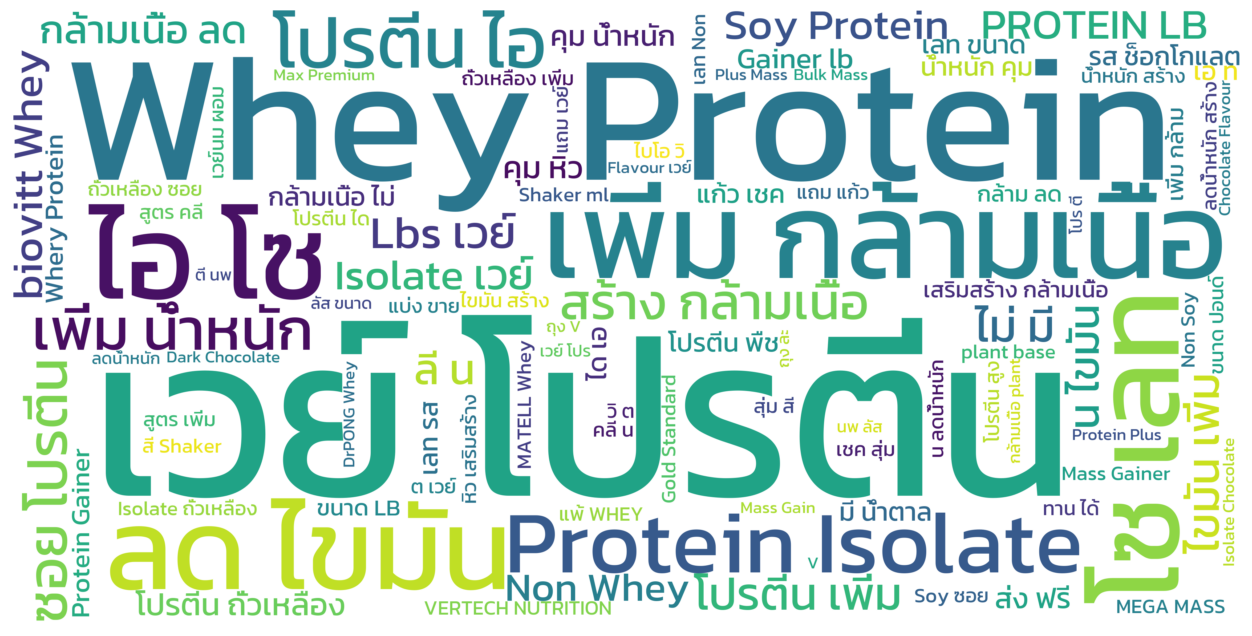

In [5]:
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final
df['itemname_tokens'] = df['itemname'].apply(text_process)
df['itemname_tokens']

#เอา text ใน columns มารวมกัน
pos_word_all = " ".join(text for text in df['itemname_tokens'])
#Remove Emoji
pos_word_all
# Define emoji pattern
emoji = re.compile("["
                   u"\U0001F600-\U0001F64F"  #Emoticons
                   u"\U0001F300-\U0001F5FF"  #Symbols & pictographs
                   u"\U0001F680-\U0001F6FF"  #Transport & map symbols
                   u"\U0001F1E0-\U0001F1FF"  #Flags (iOS)
                   u"\U00002500-\U00002BEF"  #Chinese char
                   u"\U00002702-\U000027B0"
                   u"\U00002702-\U000027B0"
                   u"\U000024C2-\U0001F251"
                   u"\U0001f926-\U0001f937"
                   u"\U00010000-\U0010ffff"
                   u"\u2640-\u2642"
                   u"\u2600-\u2B55"
                   u"\u200d"
                   u"\u23cf"
                   u"\u23e9"
                   u"\u231a"
                   u"\ufe0f"  #Dingbats
                   u"\u3030"
                   "]+", flags = re.UNICODE) #Flag option as Unicode

# Remove emoji
pos_word_all2 = re.sub(emoji, '', pos_word_all)

from wordcloud import WordCloud, STOPWORDS
text = "นำเข้า เอง  เยลลี่ เมลาโทนิน"
reg = r"[ก-๙a-zA-Z']+"
fp = r"C:\Users\infob\Desktop\python test\Kanit\Kanit-Regular.ttf"
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(height = 2000, width=4000, max_words=100, background_color="white",font_path=fp, regexp=reg).generate(pos_word_all2)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
df= df[df['start_price']<1000] 
df= df[df['last_price']<1000] 

<AxesSubplot: xlabel='sales', ylabel='start_price'>

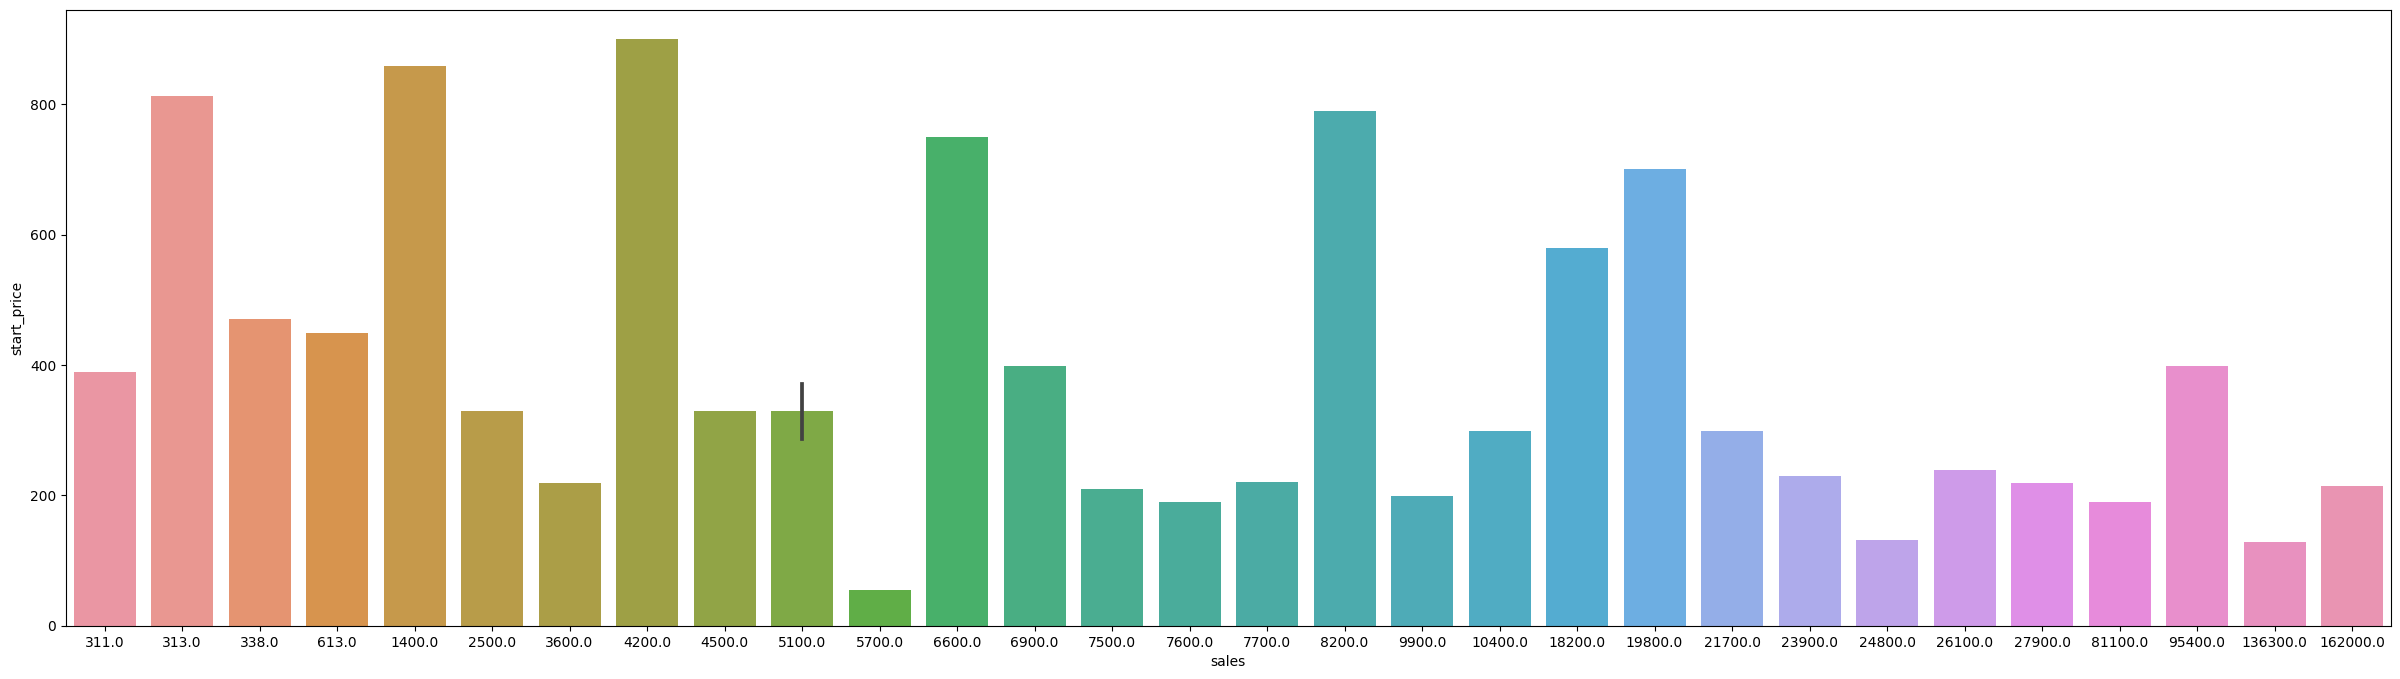

In [23]:
import seaborn as sns
plt.figure(figsize = (30,8))
sns.barplot(y= df['start_price'], x = df['sales'])


<AxesSubplot: xlabel='start_price', ylabel='Count'>

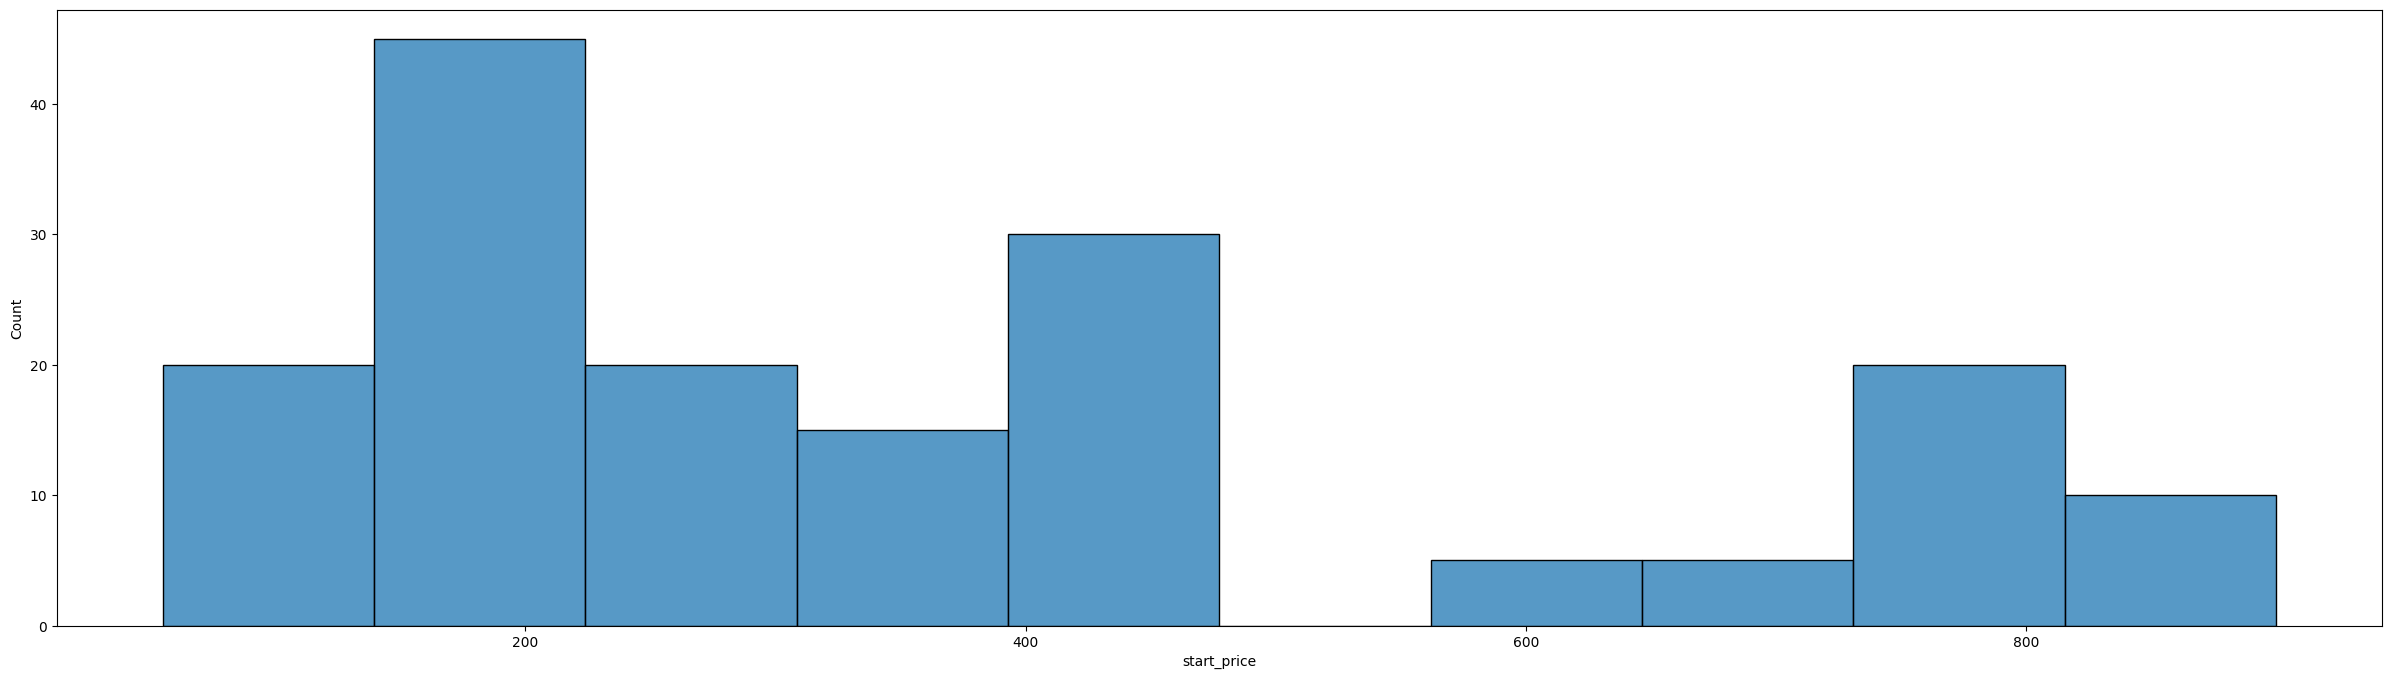

In [34]:
import seaborn as sns
plt.figure(figsize = (30,8))
sns.histplot(x= df['start_price'])

<AxesSubplot: xlabel='start_price', ylabel='last_price'>

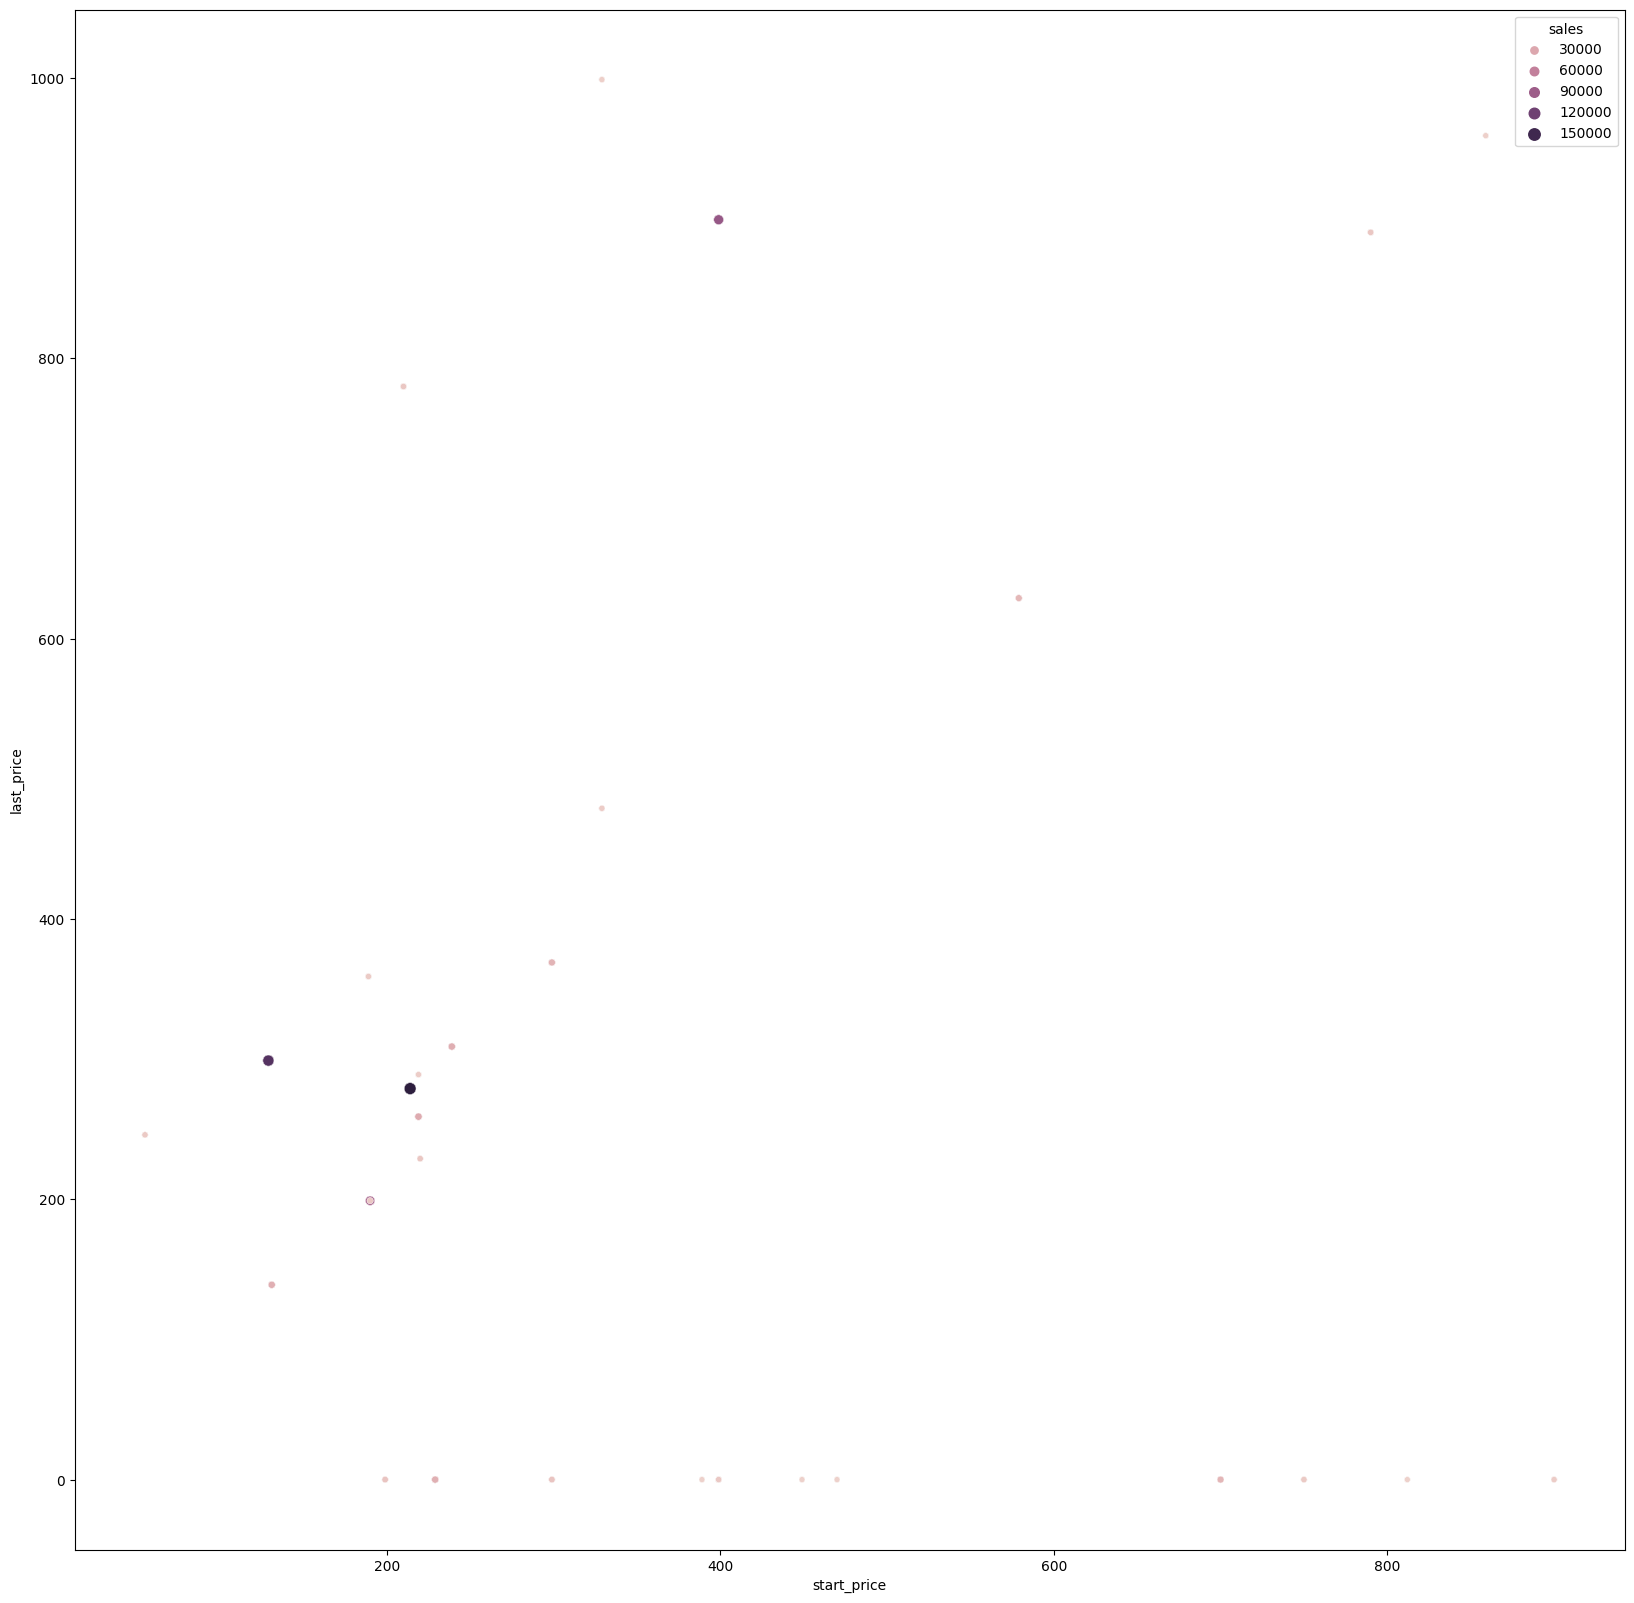

In [17]:
plt.figure(figsize = (20,20))
sns.scatterplot(df, x='start_price', y='last_price', hue='sales', size='sales')